# Problem Set 1: Data Analysis

## Exercise 2: Visualizing changes

### 1. Make a data set total_cases_to_date, representing for each day the total number of confirmed cases during the whole epidemic up until that point.

In [51]:
using CSV
using DataFrames
using Statistics
using Plots
using Mux
using WebIO
using Interact

In [52]:
data = CSV.read("covid_data.csv", DataFrame)
rename!(data, 1 => "province", 2 => "country");

In [53]:
countries = ["China", "Japan", "Korea, South", "US", "United Kingdom", "France", "Germany"];

In [54]:
num_days = length(names(data)[5:end]);

In [55]:
# Populate the country-level data dictionary for our selected countries
country_data = Dict()

for country in countries
    push!(country_data, country => zeros(num_days))
    
    df = data[findall(==(country), data.country), 5:end]
    for j in 1:num_days
        country_data[country][j] = sum((df[:, j]))
    end
end

In [56]:
# Populate the country-level cumulative data dictionary for our selected countries
total_cases_to_date = Dict()

for country in countries
    push!(total_cases_to_date, country => Int64[])
    push!(total_cases_to_date[country], country_data[country][1])
    for j in 2:num_days
        push!(total_cases_to_date[country], country_data[country][j]+total_cases_to_date[country][j-1])
    end
end

### 2. Make a set of data new_cases which is the total number of cases only during the past 7 days.

In [57]:
# Populate the country-level 7-day rolling sum data dictionary for our selected countries
new_cases = Dict()

for country in countries
    push!(new_cases, country => Int64[])
    for j in 1:num_days
        rolling_values = []
        for k in max(j-7,1):j
            push!(rolling_values, country_data[country][k])
        end
        push!(new_cases[country], sum(rolling_values))        
    end
end

### 3. Make the visualization using a slider representing days as in the previous exercise, plotting the total number of cases on the 𝑥 axis and new cases on the 𝑦 axis.

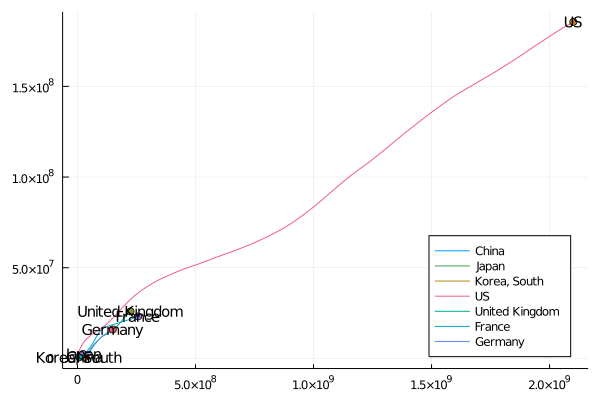

In [59]:
p = plot(leg=:bottomright);

for country in countries
    plot!(p, total_cases_to_date[country], new_cases[country], label=country);
    scatter!(p, total_cases_to_date[country][end:end], new_cases[country][end:end], label=false);
    annotate!(p, total_cases_to_date[country][end], new_cases[country][end], text(country, 10, :black))
end
p

In [60]:
# Didn't finish this one
function app(req) # req is a Mux request dictionary
    @manipulate for i in 1:num_days
        plot!(p)
    end
end
webio_serve(page("/", app), 8889)

IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
 [1] uv_error at 

Task (runnable) @0x0000000125787190

./libuv.jl:97 [inlined]
 [2] listen(::Sockets.TCPServer; backlog::Int64) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:622
 [3] #listen#10 at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:615 [inlined]
 [4] listen at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:613 [inlined]
 [5] serve(::WebSockets.ServerWS, ::Sockets.IPv4, ::Int64, ::Bool) at /Users/ericdodge/.julia/packages/WebSockets/vfjsy/src/HTTP.jl:353
 [6] serve at /Users/ericdodge/.julia/packages/WebSockets/vfjsy/src/HTTP.jl:401 [inlined]
 [7] (::Mux.var"#15#16"{Mux.App,Mux.App,Sockets.IPv4,Int64})() at ./task.jl:356
